In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-traffic-accidents/RTA Dataset.csv
/kaggle/input/road-traffic-accidents/cleaned.csv


In [2]:
rta_data = pd.read_csv("/kaggle/input/road-traffic-accidents/RTA Dataset.csv")
cleaned_data = pd.read_csv("/kaggle/input/road-traffic-accidents/cleaned.csv")

In [3]:
rta_data.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [4]:
cleaned_data.head()

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [5]:
rta_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [6]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age_band_of_driver       12316 non-null  object
 1   Sex_of_driver            12316 non-null  object
 2   Educational_level        12316 non-null  object
 3   Vehicle_driver_relation  12316 non-null  object
 4   Driving_experience       12316 non-null  object
 5   Lanes_or_Medians         12316 non-null  object
 6   Types_of_Junction        12316 non-null  object
 7   Road_surface_type        12316 non-null  object
 8   Light_conditions         12316 non-null  object
 9   Weather_conditions       12316 non-null  object
 10  Type_of_collision        12316 non-null  object
 11  Vehicle_movement         12316 non-null  object
 12  Pedestrian_movement      12316 non-null  object
 13  Cause_of_accident        12316 non-null  object
 14  Accident_severity        12316 non-nul

In [7]:
cleaned_data.describe()

,Accident_severity
count,12316.000000
mean,1.832819
std,0.406082
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,2.000000


From the above data we can say that the total number of accidents are 12316. Average accident severity is 1.832.Standard deviation is 0.406 means that the severity values tend to be relatively close to the mean. Minimum accident severity is 0 and maximum are 2. The percentile values are 2 means that the distribution might be relatively uniform around the value of 2.



Univariate Analysis

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

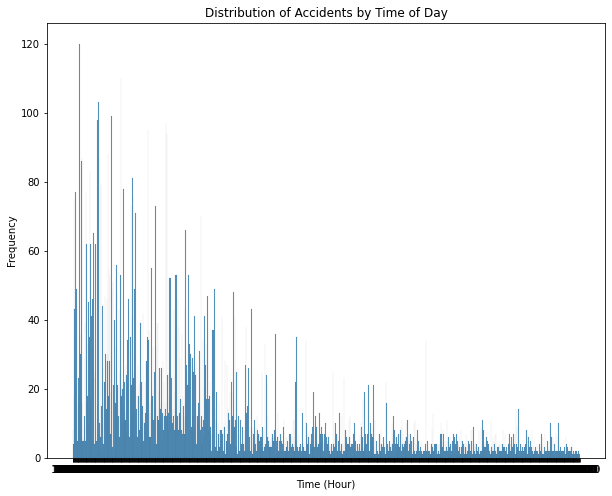

In [17]:
# Histogram for Time column
plt.figure(figsize=(10,8))
sns.histplot(rta_data['Time'], bins=24)  # Assuming time in hours
plt.title('Distribution of Accidents by Time of Day')
plt.xlabel('Time (Hour)')
plt.ylabel('Frequency')
plt.show()

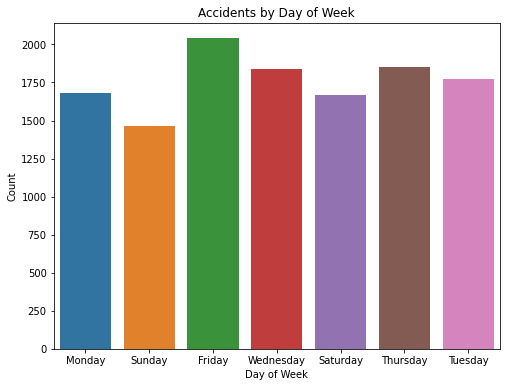

In [18]:
# Count plot for Day_of_week
plt.figure(figsize=(8, 6))
sns.countplot(x='Day_of_week', data=rta_data)
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

We can see that maximum number of accidents occur on friday

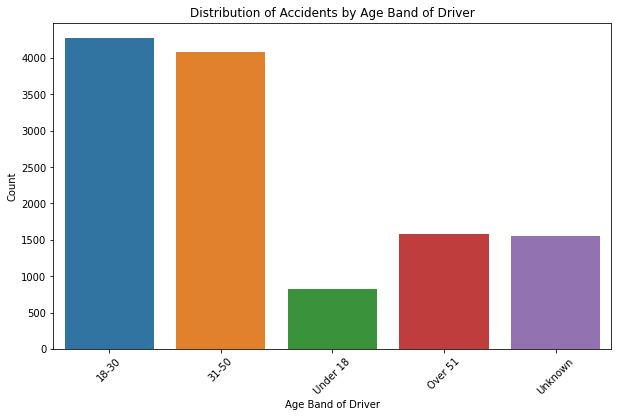

In [22]:
# Count plot for Age_band_of_driver
plt.figure(figsize=(10, 6))
sns.countplot(x='Age_band_of_driver', data=cleaned_data)
plt.title('Distribution of Accidents by Age Band of Driver')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

We can say that more number of accidents occur in the age group of 18-30 and 31-50 years.

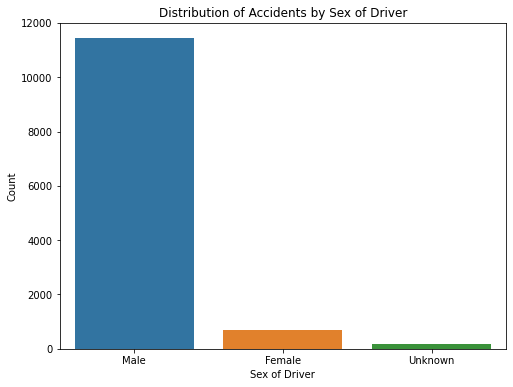

In [23]:
# Count plot for Sex_of_driver
plt.figure(figsize=(8, 6))
sns.countplot(x='Sex_of_driver', data=cleaned_data)
plt.title('Distribution of Accidents by Sex of Driver')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')
plt.show()

Bivariate Analysis

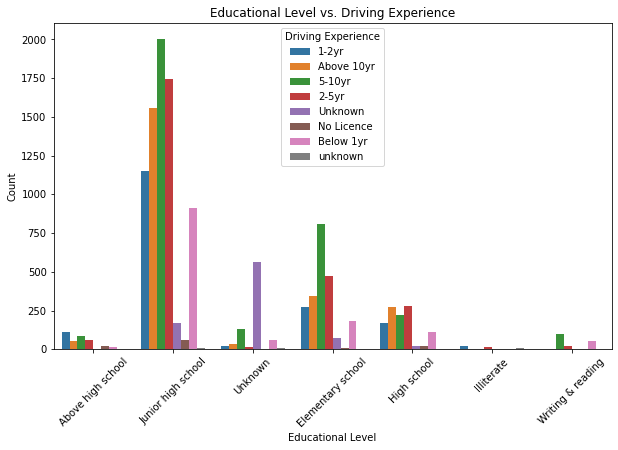

In [25]:
# Count plot for Educational_level based on Driving_experience
plt.figure(figsize=(10, 6))
sns.countplot(x='Educational_level', hue='Driving_experience', data=cleaned_data)
plt.title('Educational Level vs. Driving Experience')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Driving Experience')
plt.show()

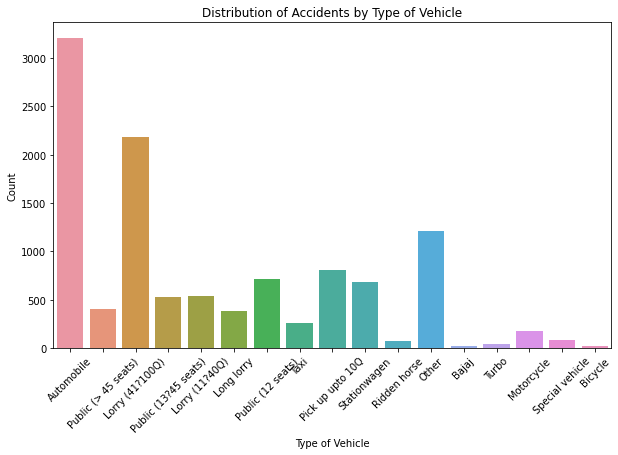

In [27]:
# Count plot for Type_of_vehicle
plt.figure(figsize=(10, 6))
sns.countplot(x='Type_of_vehicle', data=rta_data)
plt.title('Distribution of Accidents by Type of Vehicle')
plt.xlabel('Type of Vehicle')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

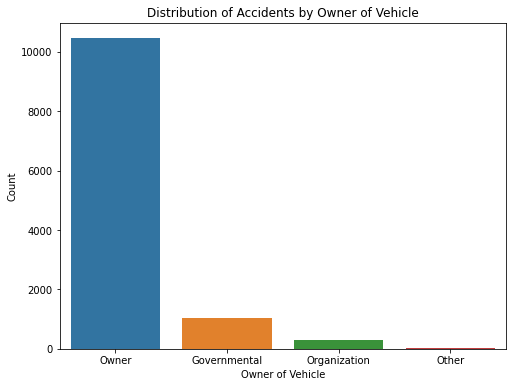

In [29]:
# Count plot for Owner_of_vehicle
plt.figure(figsize=(8, 6))
sns.countplot(x='Owner_of_vehicle', data=rta_data)
plt.title('Distribution of Accidents by Owner of Vehicle')
plt.xlabel('Owner of Vehicle')
plt.ylabel('Count')
plt.show()

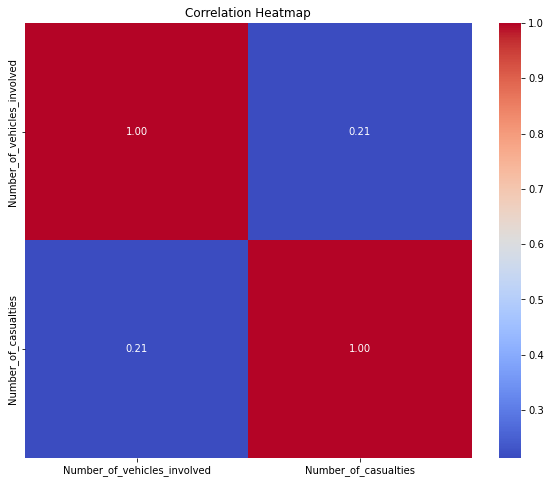

In [31]:
# Calculate correlation matrix
correlation_matrix = rta_data.corr()

# Plotting heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

Data Preparation

In [39]:
# Assuming the target variable (major cause) is stored in 'Major_Cause' column
X = cleaned_data.drop('Accident_severity', axis=1)  # Features
y = cleaned_data['Accident_severity']  # Target variable

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'cleaned_data' contains the cleaned dataset with features and target variable

# Separate features and target variable
X = cleaned_data.drop('Accident_severity', axis=1)  # Features
y = cleaned_data['Accident_severity']  # Target variable

# Perform one-hot encoding on categorical columns
X_encoded = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize and train a Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)  # You can adjust hyperparameters here
dt_clf.fit(X_train, y_train)

# Predict on the test set
dt_pred = dt_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, dt_pred)
print(f"Accuracy of the model: {accuracy}")

# Additional evaluation metrics
print(classification_report(y_test, dt_pred))  # Classification report with precision, recall, F1-score, etc.



Accuracy of the model: 0.7362012987012987
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.17      0.17      0.17       363
           2       0.84      0.85      0.85      2064

    accuracy                           0.74      2464
   macro avg       0.34      0.34      0.34      2464
weighted avg       0.73      0.74      0.73      2464



In [49]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

# Predict on the test set
rf_pred = gb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, rf_pred)
print(f"Accuracy of the model: {accuracy}")

# Additional evaluation metrics
print(classification_report(y_test, rf_pred))  # Classification report with precision, recall, F1-score, etc.

Accuracy of the model: 0.836038961038961
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.33      0.01      0.02       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.39      0.33      0.31      2464
weighted avg       0.75      0.84      0.77      2464



In [50]:
# Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

# Predict on the test set
gb_pred = gb_clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, gb_pred)
print(f"Accuracy of the model: {accuracy}")

# Additional evaluation metrics
print(classification_report(y_test, gb_pred))  # Classification report with precision, recall, F1-score, etc.

Accuracy of the model: 0.836038961038961
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.33      0.01      0.02       363
           2       0.84      1.00      0.91      2064

    accuracy                           0.84      2464
   macro avg       0.39      0.33      0.31      2464
weighted avg       0.75      0.84      0.77      2464



We can state that both Random Forest and Gradient Boosting models show similar and better performance compared to the Decision Tree model based on the provided metrics.

In [51]:
# Assuming 'accuracy' is a list containing accuracy values for each model

accuracy = {
    'Decision Tree': 0.7362012987012987,
    'Random Forest': 0.836038961038961,
    'Gradient Boosting': 0.836038961038961
}

best_model = max(accuracy, key=accuracy.get)
print(f"The best model based on accuracy is: {best_model}")


The best model based on accuracy is: Random Forest
